In [59]:
import pandas as pd

# Load the data
file_path = r"C:\Users\neba\Desktop\finance_forecasting_project\data\processed\processed_financial_data.csv"
data = pd.read_csv(file_path)

# Inspect the first few rows of the data
data.head()

,Date,TSLA_Close,TSLA_High,TSLA_Low,TSLA_Open,TSLA_Volume,BND_Close,BND_High,BND_Low,BND_Open,BND_Volume,SPY_Close,SPY_High,SPY_Low,SPY_Open,SPY_Volume
0,2015-01-02,0.010723,0.009519,0.010743,0.011513,0.067348,0.041990,0.039217,0.033972,0.030311,0.069474,0.034865,0.035210,0.037304,0.037570,0.207805
1,2015-01-05,0.009416,0.008578,0.009835,0.010324,0.077377,0.052701,0.049470,0.046467,0.044121,0.182236,0.027984,0.030554,0.032045,0.033475,0.306716
2,2015-01-06,0.009584,0.008257,0.009397,0.009682,0.092210,0.063417,0.069980,0.061197,0.057045,0.121726,0.024459,0.027493,0.027418,0.029621,0.387867
3,2015-01-07,0.009538,0.008338,0.010225,0.010153,0.037529,0.065645,0.065519,0.062086,0.061943,0.076193,0.029078,0.027493,0.031171,0.028380,0.215775
4,2015-01-08,0.009491,0.008201,0.010259,0.010075,0.045400,0.059842,0.057939,0.058515,0.060605,0.058659,0.035737,0.033874,0.036950,0.033178,0.260687


In [60]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check for missing values
missing_values = data.isnull().sum()

# Print the missing values
print("Missing Values per Column:")
print(missing_values)

# If there are missing values, we can either fill or drop them. Example: filling missing values with the previous value (forward fill)
data.fillna(method='ffill', inplace=True)

# Inspect the first few rows of the data after preprocessing
data.head()

Missing Values per Column:
TSLA_Close     0
TSLA_High      0
TSLA_Low       0
TSLA_Open      0
TSLA_Volume    0
BND_Close      0
BND_High       0
BND_Low        0
BND_Open       0
BND_Volume     0
SPY_Close      0
SPY_High       0
SPY_Low        0
SPY_Open       0
SPY_Volume     0
dtype: int64


C:\Users\neba\AppData\Local\Temp\ipykernel_10692\4149656482.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,TSLA_Close,TSLA_High,TSLA_Low,TSLA_Open,TSLA_Volume,BND_Close,BND_High,BND_Low,BND_Open,BND_Volume,SPY_Close,SPY_High,SPY_Low,SPY_Open,SPY_Volume
Date,,,,,,,,,,,,,,,
2015-01-02,0.010723,0.009519,0.010743,0.011513,0.067348,0.041990,0.039217,0.033972,0.030311,0.069474,0.034865,0.035210,0.037304,0.037570,0.207805
2015-01-05,0.009416,0.008578,0.009835,0.010324,0.077377,0.052701,0.049470,0.046467,0.044121,0.182236,0.027984,0.030554,0.032045,0.033475,0.306716
2015-01-06,0.009584,0.008257,0.009397,0.009682,0.092210,0.063417,0.069980,0.061197,0.057045,0.121726,0.024459,0.027493,0.027418,0.029621,0.387867
2015-01-07,0.009538,0.008338,0.010225,0.010153,0.037529,0.065645,0.065519,0.062086,0.061943,0.076193,0.029078,0.027493,0.031171,0.028380,0.215775
2015-01-08,0.009491,0.008201,0.010259,0.010075,0.045400,0.059842,0.057939,0.058515,0.060605,0.058659,0.035737,0.033874,0.036950,0.033178,0.260687


<Figure size 1000x600 with 0 Axes>

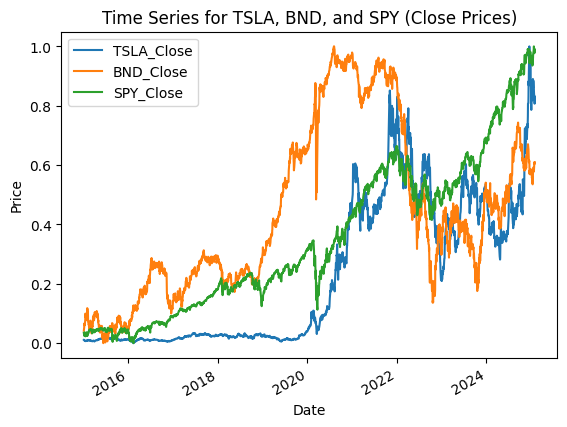

In [62]:
import matplotlib.pyplot as plt
# Plotting the time series for TSLA_Close, BND_Close, and SPY_Close
plt.figure(figsize=(10, 6))
data[['TSLA_Close', 'BND_Close', 'SPY_Close']].plot()
plt.title('Time Series for TSLA, BND, and SPY (Close Prices)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['TSLA_Close', 'BND_Close', 'SPY_Close'])
plt.show()

C:\Users\neba\AppData\Local\Temp\ipykernel_10692\3744125550.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


ADF Test for TSLA_Close:
ADF Statistic: -0.5687280656290892
p-value: 0.8778928052253434
TSLA_Close is likely non-stationary.

ADF Test for BND_Close:
ADF Statistic: -1.472262098676917
p-value: 0.5471855544642297
BND_Close is likely non-stationary.

ADF Test for SPY_Close:
ADF Statistic: 0.9362275939473704
p-value: 0.9935453533053668
SPY_Close is likely non-stationary.



<Figure size 1000x600 with 0 Axes>

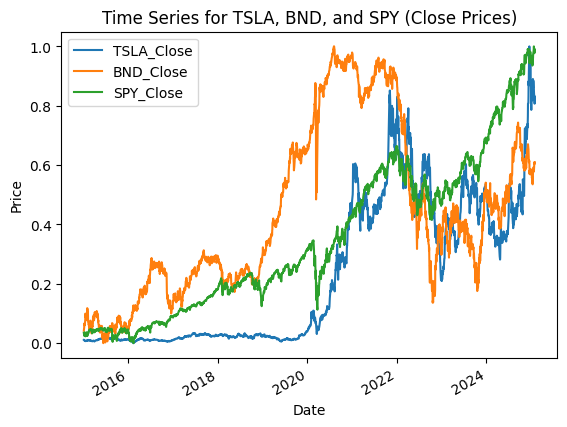


Differenced TSLA_Close:
 Date
2015-01-02         NaN
2015-01-05   -0.001307
2015-01-06    0.000169
2015-01-07   -0.000047
2015-01-08   -0.000047
Name: TSLA_Close_diff, dtype: float64


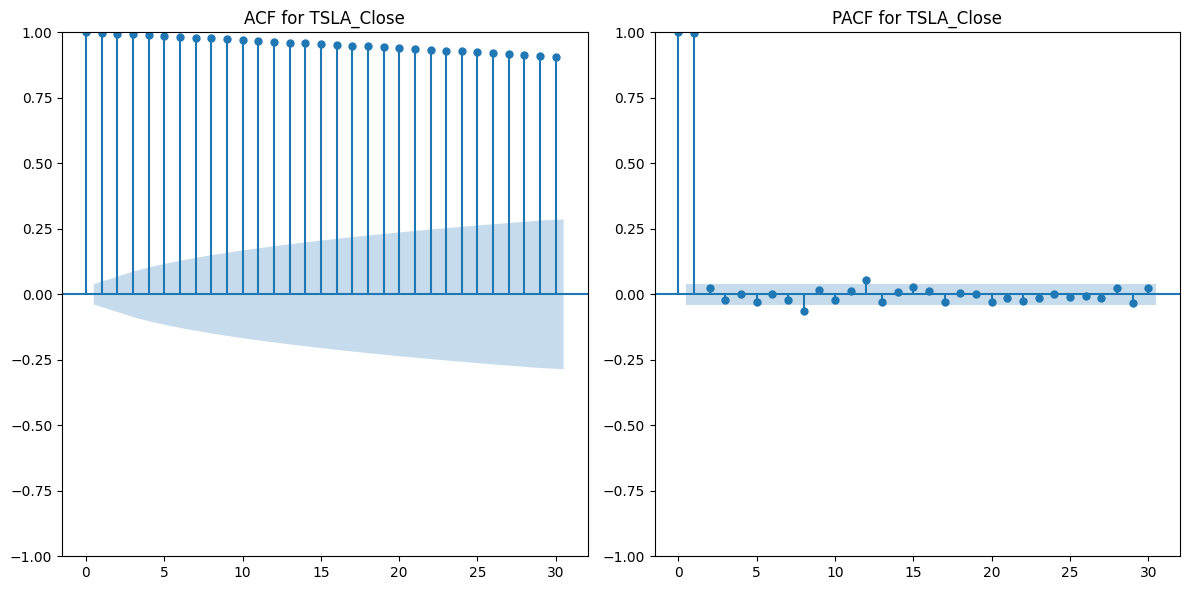

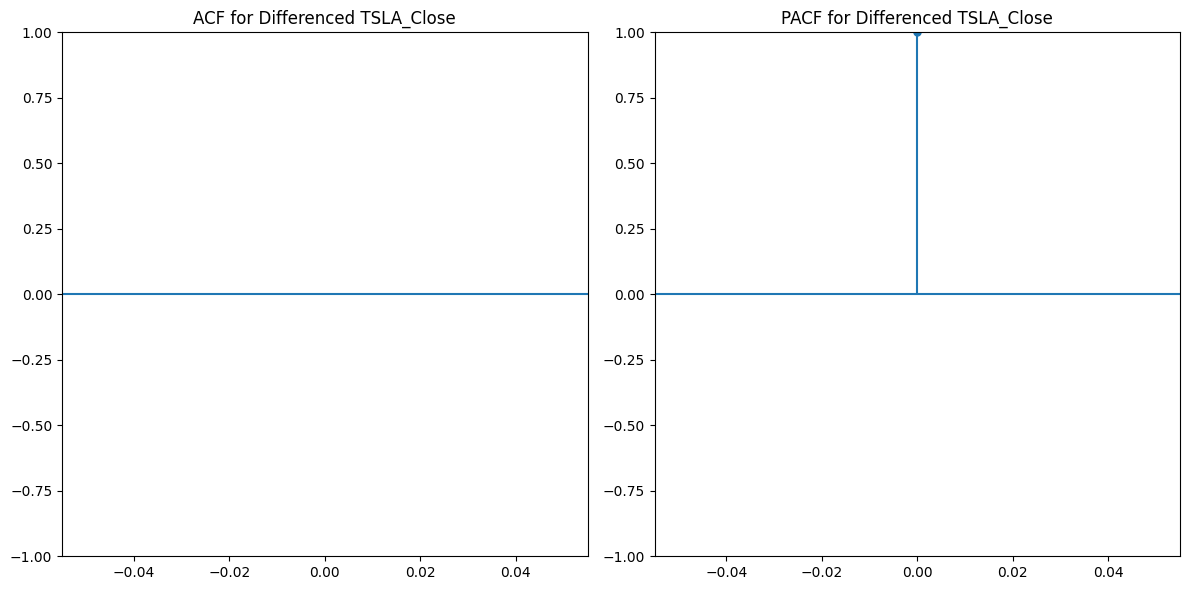

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load data
file_path = r"C:\Users\neba\Desktop\finance_forecasting_project\data\processed\processed_financial_data.csv"
data = pd.read_csv(file_path)

# Preprocessing: Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values and handle them by forward filling
data.fillna(method='ffill', inplace=True)

# Function to perform Augmented Dickey-Fuller Test
def adf_test(series, name):
    print(f"ADF Test for {name}:")
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print(f"{name} is likely stationary.\n")
    else:
        print(f"{name} is likely non-stationary.\n")

# Perform ADF test for TSLA_Close, BND_Close, and SPY_Close
adf_test(data['TSLA_Close'], 'TSLA_Close')
adf_test(data['BND_Close'], 'BND_Close')
adf_test(data['SPY_Close'], 'SPY_Close')

# Plotting the time series for TSLA_Close, BND_Close, and SPY_Close
plt.figure(figsize=(10, 6))
data[['TSLA_Close', 'BND_Close', 'SPY_Close']].plot()
plt.title('Time Series for TSLA, BND, and SPY (Close Prices)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['TSLA_Close', 'BND_Close', 'SPY_Close'])
plt.show()

# If the series is non-stationary, apply differencing (this step should be based on ADF test results)
# For example, let's apply differencing to TSLA_Close if needed.
if adfuller(data['TSLA_Close'])[1] > 0.05:
    data['TSLA_Close_diff'] = data['TSLA_Close'].diff().dropna()
    print("\nDifferenced TSLA_Close:\n", data['TSLA_Close_diff'].head())

# ACF and PACF plots for TSLA_Close
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['TSLA_Close'].dropna(), ax=plt.gca(), lags=30)  # Drop NaN values after differencing
plt.title('ACF for TSLA_Close')

plt.subplot(1, 2, 2)
plot_pacf(data['TSLA_Close'].dropna(), ax=plt.gca(), lags=30)
plt.title('PACF for TSLA_Close')

plt.tight_layout()
plt.show()

# Optional: If differencing was applied, ACF/PACF plots for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['TSLA_Close_diff'], ax=plt.gca(), lags=30)
plt.title('ACF for Differenced TSLA_Close')

plt.subplot(1, 2, 2)
plot_pacf(data['TSLA_Close_diff'], ax=plt.gca(), lags=30)
plt.title('PACF for Differenced TSLA_Close')

plt.tight_layout()
plt.show()

ADF Test for Differenced TSLA_Close:
ADF Test for TSLA_Close_diff:
ADF Statistic: -9.770527081408709
p-value: 7.156438713883501e-17
TSLA_Close_diff is likely stationary.

ADF Test for Differenced BND_Close:
ADF Test for BND_Close_diff:
ADF Statistic: -10.056271403060899
p-value: 1.3704483420431617e-17
BND_Close_diff is likely stationary.

ADF Test for Differenced SPY_Close:
ADF Test for SPY_Close_diff:
ADF Statistic: -16.104305162813635
p-value: 5.092242601522435e-29
SPY_Close_diff is likely stationary.



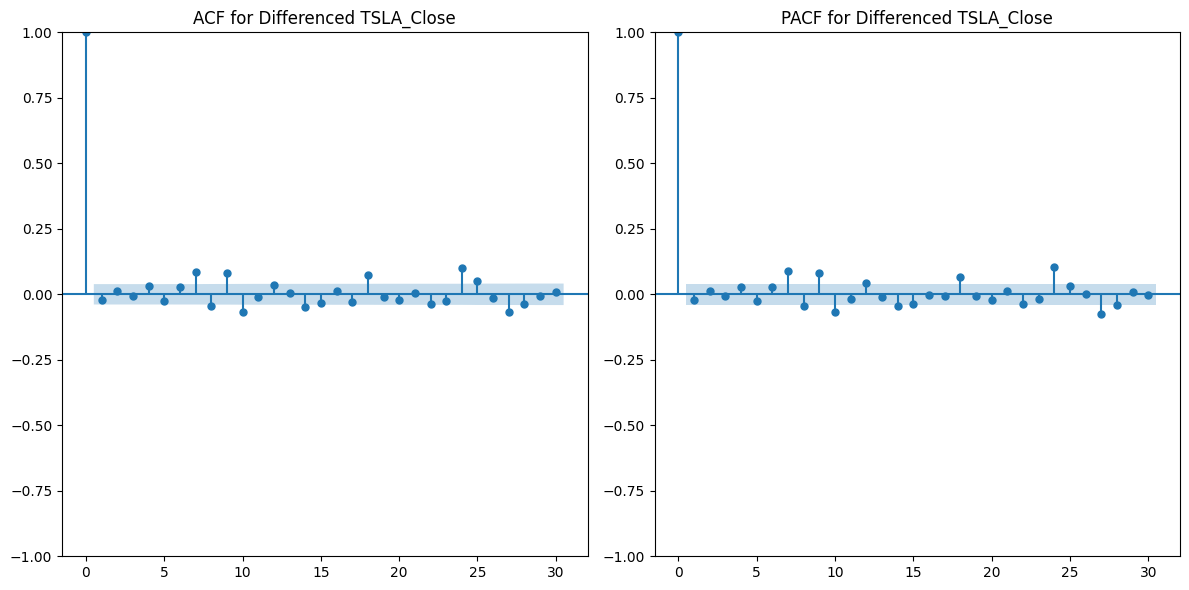

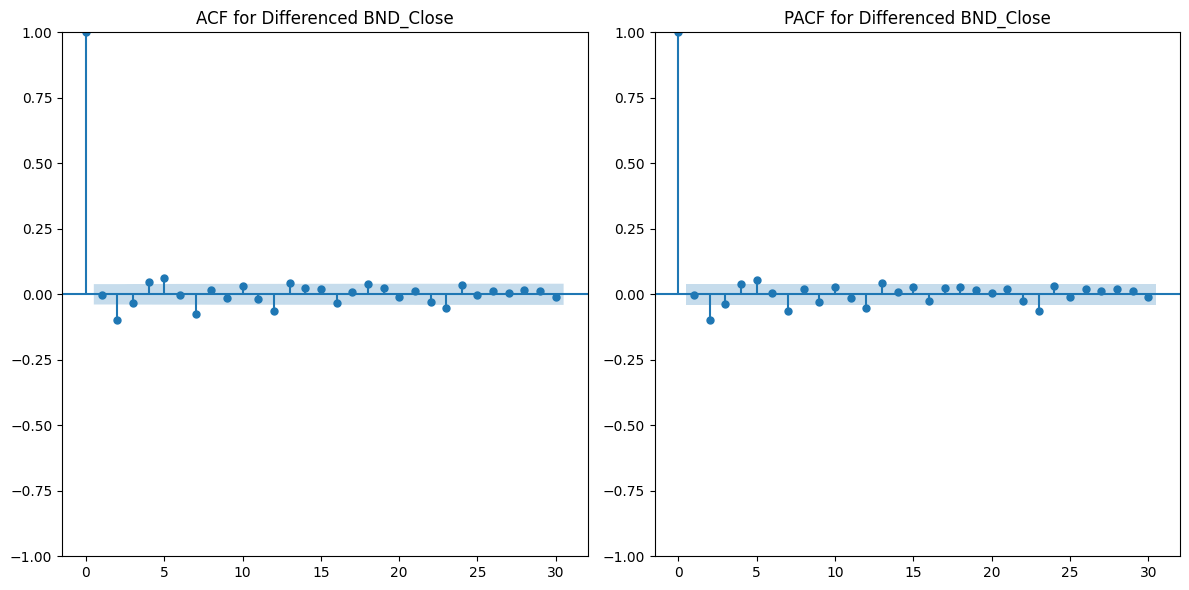

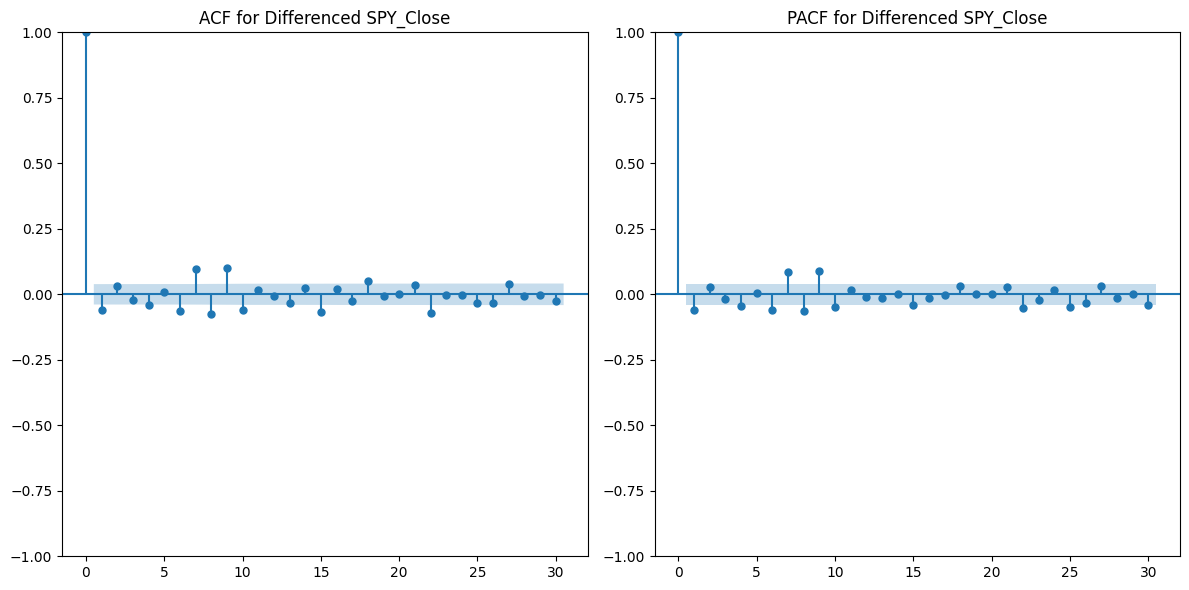

In [67]:
# Drop any residual NaN or Inf values after differencing
data['TSLA_Close_diff'] = data['TSLA_Close'].diff().dropna()
data['BND_Close_diff'] = data['BND_Close'].diff().dropna()
data['SPY_Close_diff'] = data['SPY_Close'].diff().dropna()

# Drop any remaining NaN/Inf values
data_cleaned = data.dropna(subset=['TSLA_Close_diff', 'BND_Close_diff', 'SPY_Close_diff'])

# Perform ADF test on differenced series
print("ADF Test for Differenced TSLA_Close:")
adf_test(data_cleaned['TSLA_Close_diff'], 'TSLA_Close_diff')

print("ADF Test for Differenced BND_Close:")
adf_test(data_cleaned['BND_Close_diff'], 'BND_Close_diff')

print("ADF Test for Differenced SPY_Close:")
adf_test(data_cleaned['SPY_Close_diff'], 'SPY_Close_diff')

# Plot ACF and PACF for Differenced Series
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data_cleaned['TSLA_Close_diff'], ax=plt.gca(), lags=30)
plt.title('ACF for Differenced TSLA_Close')

plt.subplot(1, 2, 2)
plot_pacf(data_cleaned['TSLA_Close_diff'], ax=plt.gca(), lags=30)
plt.title('PACF for Differenced TSLA_Close')

plt.tight_layout()
plt.show()

# Similarly, ACF and PACF for BND_Close_diff and SPY_Close_diff
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data_cleaned['BND_Close_diff'], ax=plt.gca(), lags=30)
plt.title('ACF for Differenced BND_Close')

plt.subplot(1, 2, 2)
plot_pacf(data_cleaned['BND_Close_diff'], ax=plt.gca(), lags=30)
plt.title('PACF for Differenced BND_Close')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data_cleaned['SPY_Close_diff'], ax=plt.gca(), lags=30)
plt.title('ACF for Differenced SPY_Close')

plt.subplot(1, 2, 2)
plot_pacf(data_cleaned['SPY_Close_diff'], ax=plt.gca(), lags=30)
plt.title('PACF for Differenced SPY_Close')

plt.tight_layout()
plt.show()

C:\Users\neba\AppData\Local\Temp\ipykernel_10692\937326513.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


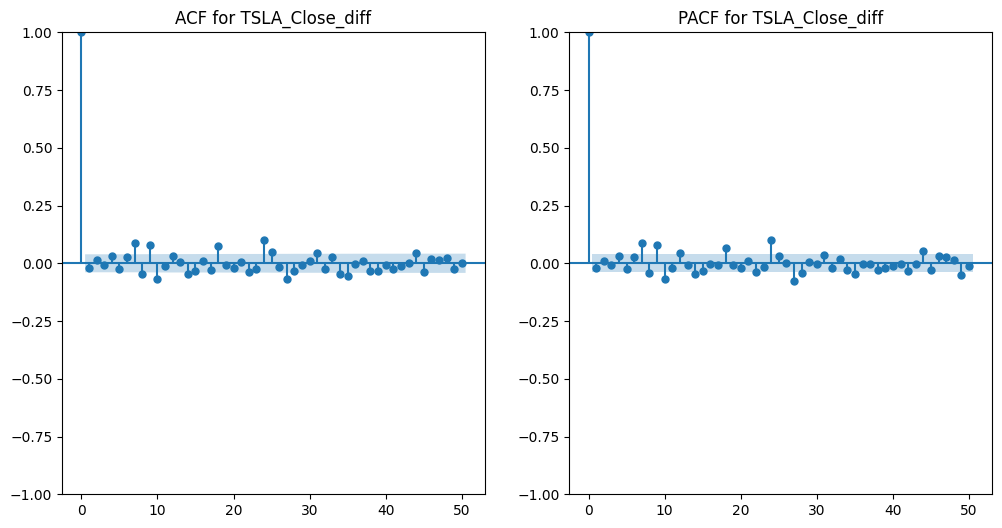

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

                               SARIMAX Results                                
Dep. Variable:        TSLA_Close_diff   No. Observations:                 2535
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7295.526
Date:                Thu, 06 Mar 2025   AIC                         -14585.052
Time:                        12:05:38   BIC                         -14567.539
Sample:                             0   HQIC                        -14578.698
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0200      0.012     -1.685      0.092      -0.043       0.003
ma.L1         -0.9999      0.023    -43.093      0.000      -1.045      -0.954
sigma2         0.0002   4.68e-06     38.949      0.0

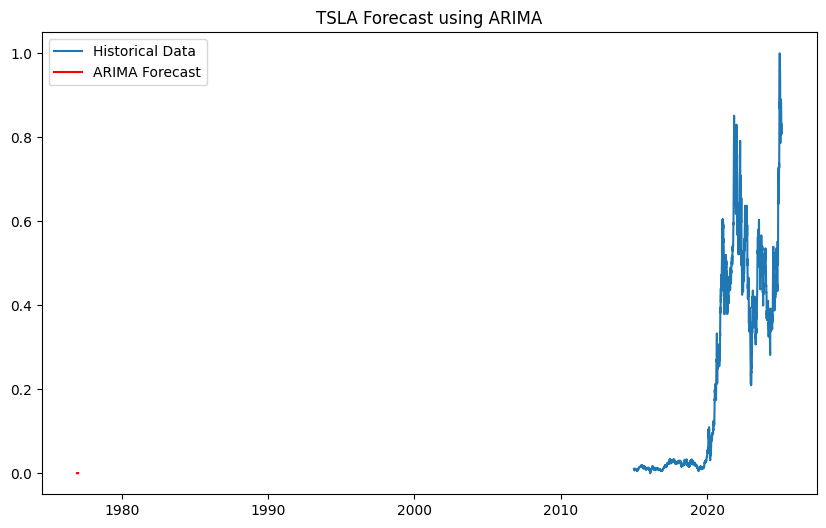

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        TSLA_Close   No. Observations:                 2535
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                7278.769
Date:                           Thu, 06 Mar 2025   AIC                         -14547.539
Time:                                   12:05:43   BIC                         -14518.361
Sample:                                        0   HQIC                        -14536.952
                                          - 2535                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3578      1.099      0.326      0.745      -1.796       2.511
ma.L1         -0.3665      1.092     -0.336

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


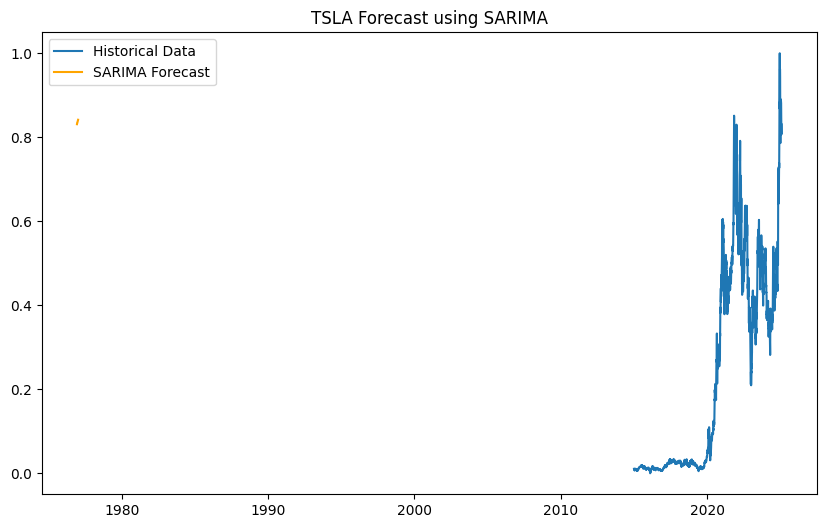

ARIMA Model - MAE: 0.8676068262926139, RMSE: 0.8690661811665639, MAPE: 0.9993426370479265
SARIMA Model - MAE: 0.04458371588988417, RMSE: 0.0611306584985593, MAPE: 0.04918698954314014


In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 1: Load Data (Using the correct path)
data = pd.read_csv(r'C:\Users\neba\Desktop\finance_forecasting_project\data\processed\processed_financial_data.csv', parse_dates=['Date'], index_col='Date')

# Step 2: Handle Missing Values (you’ve already done this)
data.fillna(method='ffill', inplace=True)

# Step 3: Differencing to make the data stationary (You’ve already differenced)
data['TSLA_Close_diff'] = data['TSLA_Close'].diff().dropna()
data['BND_Close_diff'] = data['BND_Close'].diff().dropna()
data['SPY_Close_diff'] = data['SPY_Close'].diff().dropna()

# Step 4: ADF Test (already done, confirming stationarity)
# ADF Test has already been conducted for TSLA_Close, BND_Close, SPY_Close, and their differenced versions.

# Step 5: ACF/PACF plots to determine p, q values for ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['TSLA_Close_diff'].dropna(), lags=50, ax=plt.gca())
plt.title("ACF for TSLA_Close_diff")

plt.subplot(122)
plot_pacf(data['TSLA_Close_diff'].dropna(), lags=50, ax=plt.gca())
plt.title("PACF for TSLA_Close_diff")
plt.show()

# Based on the plots, determine the values of p and q for ARIMA. 
# If you're using SARIMA, also consider seasonal lags.

# Step 6: Fit ARIMA or SARIMA Model

# ARIMA Model (Example with p=1, d=1, q=1)
model_arima = ARIMA(data['TSLA_Close_diff'], order=(1, 1, 1))
fit_arima = model_arima.fit()

# Print ARIMA model summary
print(fit_arima.summary())

# Forecast next 30 steps (for example)
forecast_arima = fit_arima.forecast(steps=30)

# Plot the forecasted values along with historical data
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA_Close'], label='Historical Data')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('TSLA Forecast using ARIMA')
plt.legend()
plt.show()

# Step 7: SARIMA Model (If you have seasonal data)
# Example of SARIMA model (p=1, d=1, q=1)(P=1, D=1, Q=1, S=5) 
# where S=5 indicates a seasonal period (e.g., monthly data has seasonality every 12 months)

model_sarima = SARIMAX(data['TSLA_Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
fit_sarima = model_sarima.fit()

# Print SARIMA model summary
print(fit_sarima.summary())

# Forecast the next 30 steps using SARIMA
forecast_sarima = fit_sarima.forecast(steps=30)

# Plot the forecasted values from SARIMA model
plt.figure(figsize=(10, 6))
plt.plot(data['TSLA_Close'], label='Historical Data')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='orange')
plt.title('TSLA Forecast using SARIMA')
plt.legend()
plt.show()

# Step 8: Evaluation (Compare forecast with real data if available)
# For now, assuming you have a test set or comparing with the last 30 data points
y_true = data['TSLA_Close'][-30:]  # Replace with actual test data if available
y_pred_arima = forecast_arima
y_pred_sarima = forecast_sarima

# Calculate MAE, RMSE, and MAPE for ARIMA and SARIMA models
mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)

mae_sarima = mean_absolute_error(y_true, y_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(y_true, y_pred_sarima))
mape_sarima = mean_absolute_percentage_error(y_true, y_pred_sarima)

# Print evaluation metrics
print(f"ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

                               SARIMAX Results                                
Dep. Variable:         BND_Close_diff   No. Observations:                 2535
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7173.246
Date:                Thu, 06 Mar 2025   AIC                         -14340.492
Time:                        12:09:45   BIC                         -14322.979
Sample:                             0   HQIC                        -14334.138
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0008      0.004     -0.192      0.848      -0.009       0.007
ma.L1         -0.9999      0.016    -63.776      0.000      -1.031      -0.969
sigma2         0.0002   3.48e-06     57.796      0.0

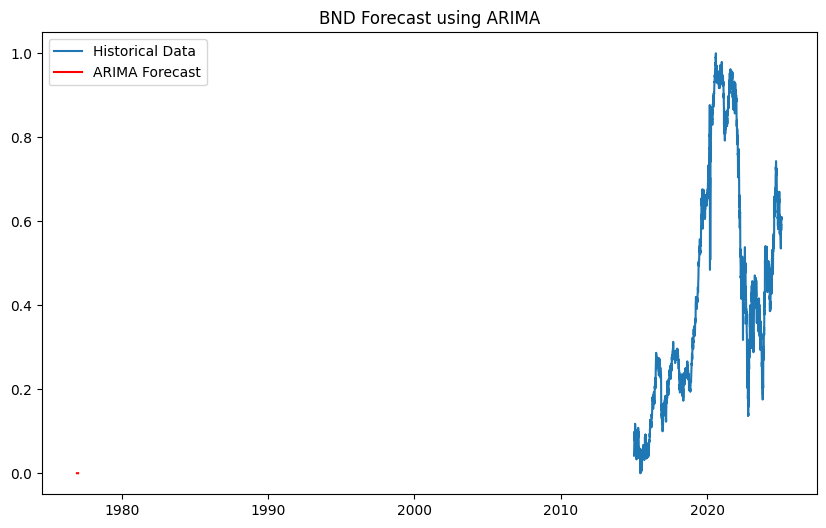

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         BND_Close   No. Observations:                 2535
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                7167.192
Date:                           Thu, 06 Mar 2025   AIC                         -14324.385
Time:                                   12:09:50   BIC                         -14295.207
Sample:                                        0   HQIC                        -14313.798
                                          - 2535                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7473      0.064     11.652      0.000       0.622       0.873
ma.L1         -0.7858      0.063    -12.438

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


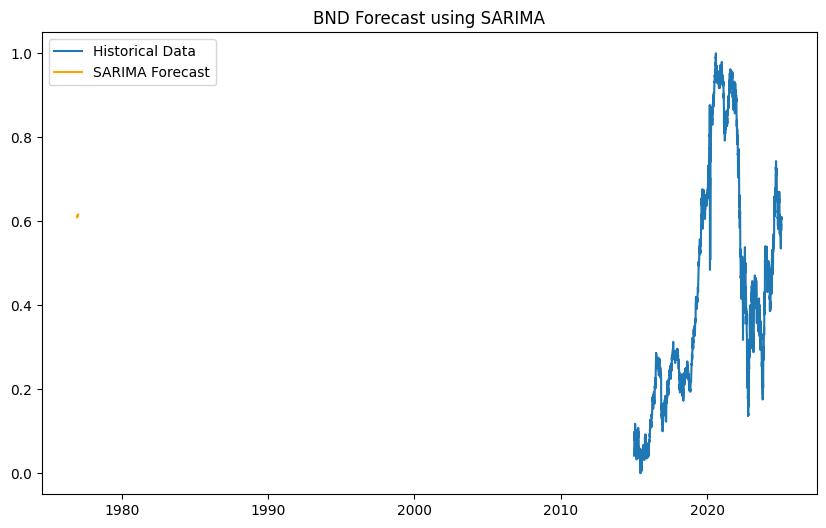

ARIMA Model for BND - MAE: 0.579137407443212, RMSE: 0.5794971359737476, MAPE: 0.9997489271097435
SARIMA Model for BND - MAE: 0.03454522447428899, RMSE: 0.03958319281535516, MAPE: 0.06089883687393975


In [73]:
# Fit ARIMA and SARIMA models for BND

# ARIMA Model for BND
model_arima_bnd = ARIMA(data['BND_Close_diff'], order=(1, 1, 1))
fit_arima_bnd = model_arima_bnd.fit()

# Print ARIMA model summary for BND
print(fit_arima_bnd.summary())

# Forecast next 30 steps (for example) for BND
forecast_arima_bnd = fit_arima_bnd.forecast(steps=30)

# Plot the forecasted values along with historical data for BND
plt.figure(figsize=(10, 6))
plt.plot(data['BND_Close'], label='Historical Data')
plt.plot(forecast_arima_bnd, label='ARIMA Forecast', color='red')
plt.title('BND Forecast using ARIMA')
plt.legend()
plt.show()

# SARIMA Model for BND
model_sarima_bnd = SARIMAX(data['BND_Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
fit_sarima_bnd = model_sarima_bnd.fit()

# Print SARIMA model summary for BND
print(fit_sarima_bnd.summary())

# Forecast the next 30 steps using SARIMA for BND
forecast_sarima_bnd = fit_sarima_bnd.forecast(steps=30)

# Plot the forecasted values from SARIMA model for BND
plt.figure(figsize=(10, 6))
plt.plot(data['BND_Close'], label='Historical Data')
plt.plot(forecast_sarima_bnd, label='SARIMA Forecast', color='orange')
plt.title('BND Forecast using SARIMA')
plt.legend()
plt.show()

# Step 8: Evaluation for BND (Compare forecast with real data if available)
y_true_bnd = data['BND_Close'][-30:]  # Replace with actual test data if available
y_pred_arima_bnd = forecast_arima_bnd
y_pred_sarima_bnd = forecast_sarima_bnd

# Calculate MAE, RMSE, and MAPE for ARIMA and SARIMA models for BND
mae_arima_bnd = mean_absolute_error(y_true_bnd, y_pred_arima_bnd)
rmse_arima_bnd = np.sqrt(mean_squared_error(y_true_bnd, y_pred_arima_bnd))
mape_arima_bnd = mean_absolute_percentage_error(y_true_bnd, y_pred_arima_bnd)

mae_sarima_bnd = mean_absolute_error(y_true_bnd, y_pred_sarima_bnd)
rmse_sarima_bnd = np.sqrt(mean_squared_error(y_true_bnd, y_pred_sarima_bnd))
mape_sarima_bnd = mean_absolute_percentage_error(y_true_bnd, y_pred_sarima_bnd)

# Print evaluation metrics for BND
print(f"ARIMA Model for BND - MAE: {mae_arima_bnd}, RMSE: {rmse_arima_bnd}, MAPE: {mape_arima_bnd}")
print(f"SARIMA Model for BND - MAE: {mae_sarima_bnd}, RMSE: {rmse_sarima_bnd}, MAPE: {mape_sarima_bnd}")


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization

                               SARIMAX Results                                
Dep. Variable:         SPY_Close_diff   No. Observations:                 2535
Model:                 ARIMA(1, 1, 1)   Log Likelihood                8699.463
Date:                Thu, 06 Mar 2025   AIC                         -17392.925
Time:                        12:10:17   BIC                         -17375.412
Sample:                             0   HQIC                        -17386.572
                               - 2535                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0605      0.011     -5.711      0.000      -0.081      -0.040
ma.L1         -0.9997      0.024    -40.918      0.000      -1.048      -0.952
sigma2      6.021e-05    1.7e-06     35.376      0.0

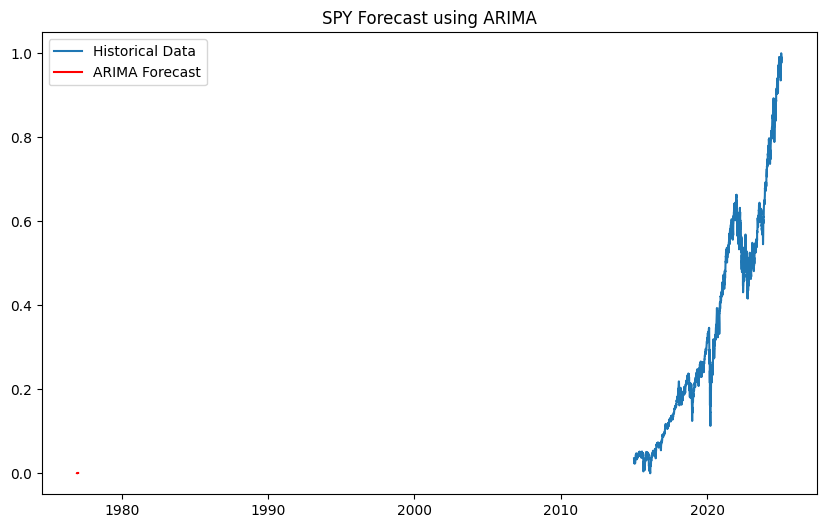

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                         SPY_Close   No. Observations:                 2535
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                8680.039
Date:                           Thu, 06 Mar 2025   AIC                         -17350.079
Time:                                   12:10:23   BIC                         -17320.901
Sample:                                        0   HQIC                        -17339.492
                                          - 2535                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3691      0.197      1.874      0.061      -0.017       0.755
ma.L1         -0.4136      0.193     -2.140

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


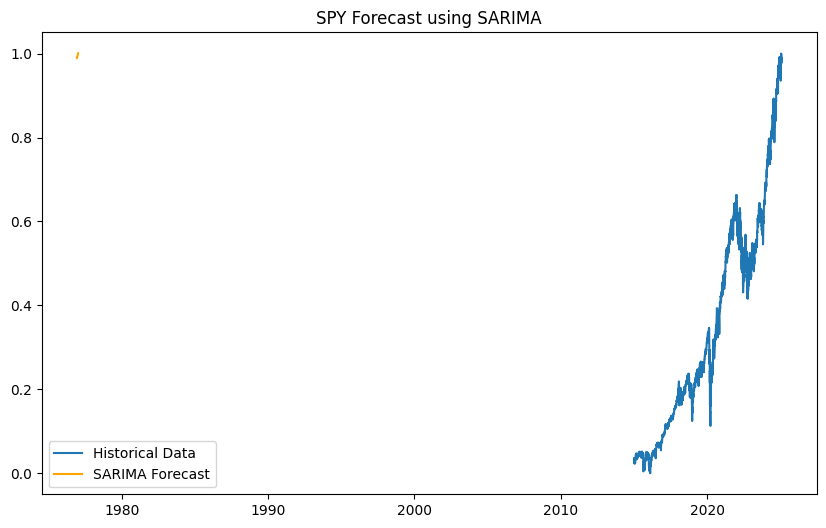

ARIMA Model for SPY - MAE: 0.9665202071941122, RMSE: 0.966706141696577, MAPE: 0.9992549988203493
SARIMA Model for SPY - MAE: 0.027834302160868952, RMSE: 0.0330745602248232, MAPE: 0.029145058102079225


In [74]:
# Fit ARIMA and SARIMA models for SPY

# ARIMA Model for SPY
model_arima_spy = ARIMA(data['SPY_Close_diff'], order=(1, 1, 1))
fit_arima_spy = model_arima_spy.fit()

# Print ARIMA model summary for SPY
print(fit_arima_spy.summary())

# Forecast next 30 steps (for example) for SPY
forecast_arima_spy = fit_arima_spy.forecast(steps=30)

# Plot the forecasted values along with historical data for SPY
plt.figure(figsize=(10, 6))
plt.plot(data['SPY_Close'], label='Historical Data')
plt.plot(forecast_arima_spy, label='ARIMA Forecast', color='red')
plt.title('SPY Forecast using ARIMA')
plt.legend()
plt.show()

# SARIMA Model for SPY
model_sarima_spy = SARIMAX(data['SPY_Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
fit_sarima_spy = model_sarima_spy.fit()

# Print SARIMA model summary for SPY
print(fit_sarima_spy.summary())

# Forecast the next 30 steps using SARIMA for SPY
forecast_sarima_spy = fit_sarima_spy.forecast(steps=30)

# Plot the forecasted values from SARIMA model for SPY
plt.figure(figsize=(10, 6))
plt.plot(data['SPY_Close'], label='Historical Data')
plt.plot(forecast_sarima_spy, label='SARIMA Forecast', color='orange')
plt.title('SPY Forecast using SARIMA')
plt.legend()
plt.show()

# Step 8: Evaluation for SPY (Compare forecast with real data if available)
y_true_spy = data['SPY_Close'][-30:]  # Replace with actual test data if available
y_pred_arima_spy = forecast_arima_spy
y_pred_sarima_spy = forecast_sarima_spy

# Calculate MAE, RMSE, and MAPE for ARIMA and SARIMA models for SPY
mae_arima_spy = mean_absolute_error(y_true_spy, y_pred_arima_spy)
rmse_arima_spy = np.sqrt(mean_squared_error(y_true_spy, y_pred_arima_spy))
mape_arima_spy = mean_absolute_percentage_error(y_true_spy, y_pred_arima_spy)

mae_sarima_spy = mean_absolute_error(y_true_spy, y_pred_sarima_spy)
rmse_sarima_spy = np.sqrt(mean_squared_error(y_true_spy, y_pred_sarima_spy))
mape_sarima_spy = mean_absolute_percentage_error(y_true_spy, y_pred_sarima_spy)

# Print evaluation metrics for SPY
print(f"ARIMA Model for SPY - MAE: {mae_arima_spy}, RMSE: {rmse_arima_spy}, MAPE: {mape_arima_spy}")
print(f"SARIMA Model for SPY - MAE: {mae_sarima_spy}, RMSE: {rmse_sarima_spy}, MAPE: {mape_sarima_spy}")

In [75]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train, test = data['TSLA_Close'][:train_size], data['TSLA_Close'][train_size:]

# Differencing on train data to ensure stationarity
train_diff = train.diff().dropna()
test_diff = test.diff().dropna()

# Fit SARIMA model on the training data
model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))
fit_sarima = model_sarima.fit()

# Print SARIMA model summary
print(fit_sarima.summary())

# Forecast the next steps using SARIMA
forecast_sarima = fit_sarima.forecast(steps=len(test))


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                        TSLA_Close   No. Observations:                 2028
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood                6104.166
Date:                           Thu, 06 Mar 2025   AIC                         -12198.333
Time:                                   12:14:28   BIC                         -12170.273
Sample:                                        0   HQIC                        -12188.036
                                          - 2028                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0833      0.276     -0.302      0.763      -0.625       0.458
ma.L1          0.0464      0.276      0.168

c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [77]:
# Calculate evaluation metrics for SARIMA
mae_sarima = mean_absolute_error(test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
mape_sarima = mean_absolute_percentage_error(test, forecast_sarima)

# Print evaluation metrics for SARIMA
print(f"SARIMA Model - MAE: {mae_sarima}, RMSE: {rmse_sarima}, MAPE: {mape_sarima}")

SARIMA Model - MAE: 0.1590282909011899, RMSE: 0.20505242512482094, MAPE: 0.2933659516852138


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


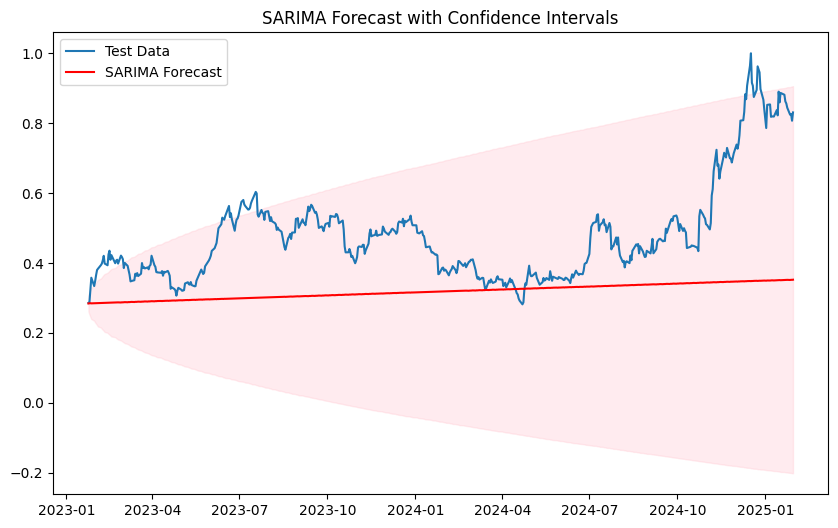

In [78]:
# Forecast with confidence intervals
forecast_sarima_ci = fit_sarima.get_forecast(steps=len(test))
forecast_ci = forecast_sarima_ci.conf_int()

# Plotting the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast', color='red')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()


Data loaded successfully with 2535 rows
Data date range: 2015-01-02 00:00:00 to 2025-01-30 00:00:00
Current values in the dataset:
TSLA_Close: min=$0.00, max=$1.00, current=$0.83
BND_Close: min=$0.00, max=$1.00, current=$0.61
SPY_Close: min=$0.00, max=$1.00, current=$0.99

Last known prices:
TSLA: $0.83
BND: $0.61
SPY: $0.99
Last known TSLA price: $0.83


C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[0] = last_price + forecast_diff[0]
C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[i] = arima_prices[i-1] + forecast_diff[i]


Last known BND price: $0.61


c:\Users\neba\Desktop\finance_forecasting_project\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[0] = last_price + forecast_diff[0]
C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[i] = arima_prices[i-1] + forecast_diff[i]


Last known SPY price: $0.99


C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[0] = last_price + forecast_diff[0]
C:\Users\neba\AppData\Local\Temp\ipykernel_10692\2854939820.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  arima_prices[i] = arima_prices[i-1] + forecast_diff[i]



Forecast Summary:
TSLA_ARIMA_Forecast:
  Start: $0.83
  End: $0.97
  Min: $0.83
  Max: $0.97
  Mean: $0.90

TSLA_SARIMA_Forecast:
  Start: $0.83
  End: $0.93
  Min: $0.83
  Max: $0.93
  Mean: $0.88

BND_ARIMA_Forecast:
  Start: $0.61
  End: $0.64
  Min: $0.61
  Max: $0.64
  Mean: $0.63

BND_SARIMA_Forecast:
  Start: $0.61
  End: $0.66
  Min: $0.61
  Max: $0.66
  Mean: $0.64

SPY_ARIMA_Forecast:
  Start: $0.99
  End: $1.16
  Min: $0.99
  Max: $1.16
  Mean: $1.08

SPY_SARIMA_Forecast:
  Start: $0.99
  End: $1.08
  Min: $0.99
  Max: $1.08
  Mean: $1.03

First 5 days of forecasts:
            TSLA_ARIMA_Forecast  TSLA_SARIMA_Forecast  BND_ARIMA_Forecast  \
2025-01-31                $0.83                 $0.83               $0.61   
2025-02-03                $0.83                 $0.83               $0.61   
2025-02-04                $0.83                 $0.83               $0.61   
2025-02-05                $0.83                 $0.83               $0.61   
2025-02-06                $0.8

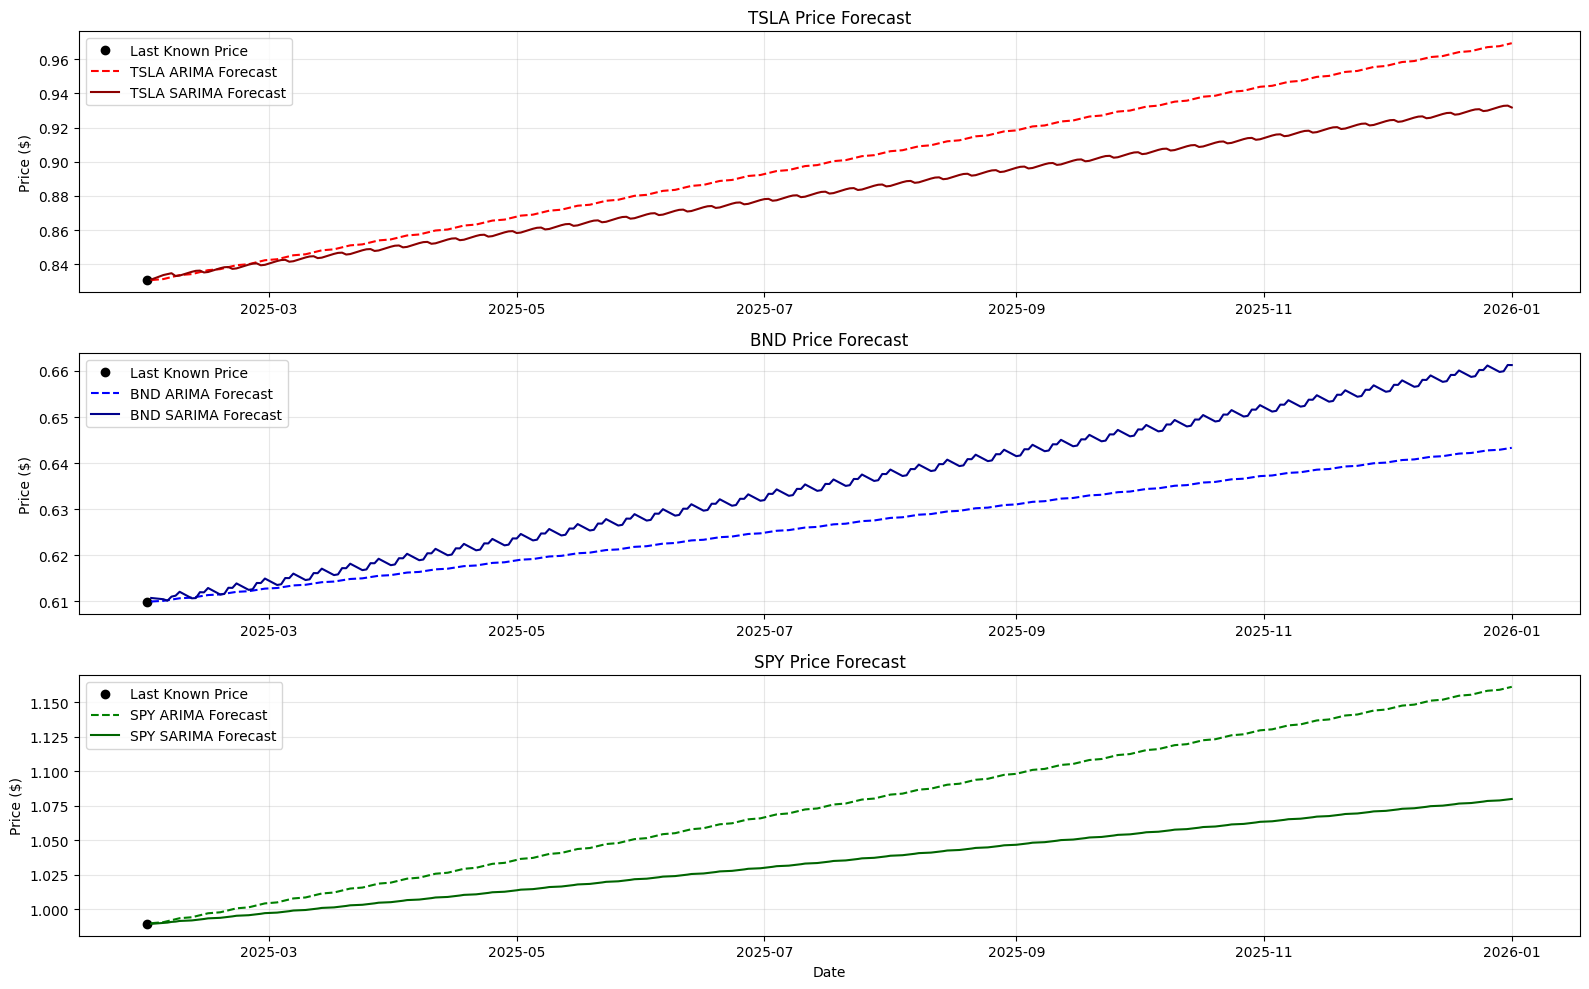

Historical comparison plot saved to: C:\Users\neba\Desktop\finance_forecasting_project\figures\historical_vs_forecasted_1741257316.png


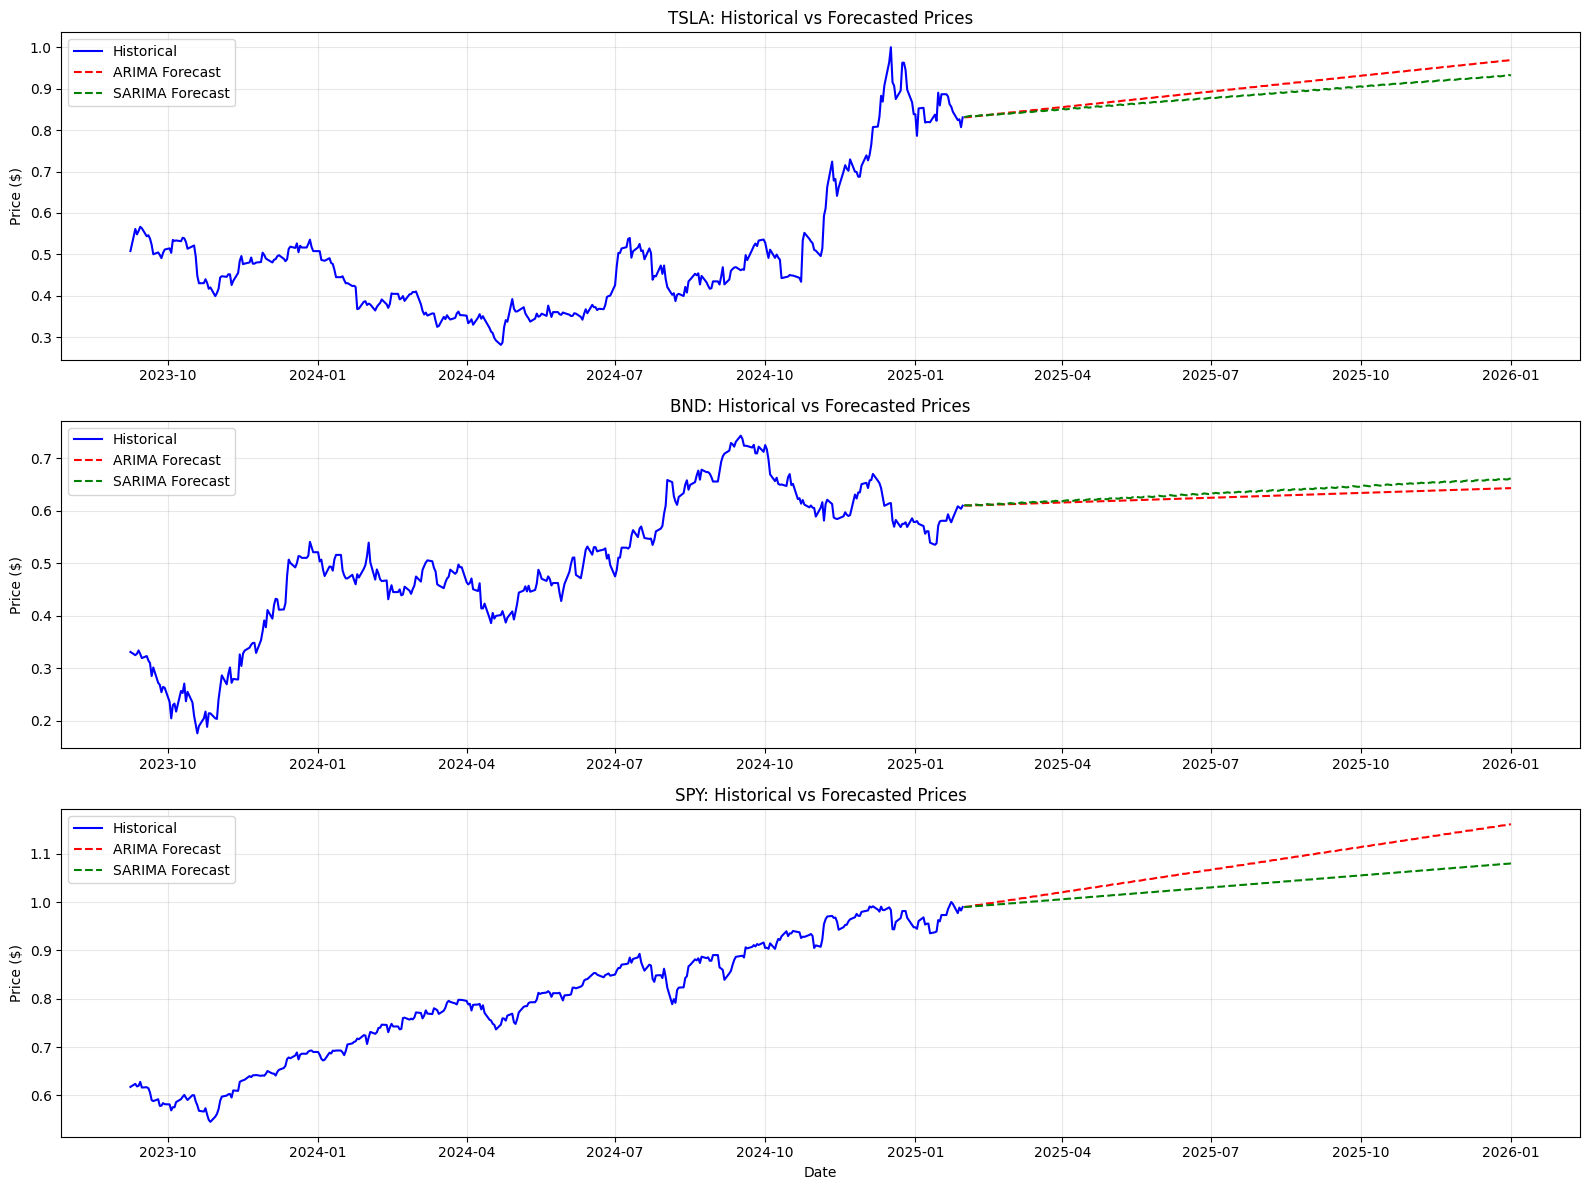


Forecasting process completed.


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import tempfile
import time

# Create directories if they don't exist
project_dir = r'C:\Users\neba\Desktop\finance_forecasting_project'
data_dir = os.path.join(project_dir, 'data')
figures_dir = os.path.join(project_dir, 'figures')

for directory in [data_dir, figures_dir]:
    if not os.path.exists(directory):
        try:
            os.makedirs(directory)
            print(f"Created directory: {directory}")
        except Exception as e:
            print(f"Failed to create directory {directory}: {e}")

# Generate unique filenames to avoid permission issues
timestamp = int(time.time())
csv_filename = os.path.join(data_dir, f'forecasted_prices_{timestamp}.csv')
fig1_filename = os.path.join(figures_dir, f'forecasted_prices_{timestamp}.png')
fig2_filename = os.path.join(figures_dir, f'historical_vs_forecasted_{timestamp}.png')

# Load the data
try:
    data = pd.read_csv(r'C:\Users\neba\Desktop\finance_forecasting_project\data\processed\processed_financial_data.csv', parse_dates=['Date'], index_col='Date')
    print(f"Data loaded successfully with {len(data)} rows")
except Exception as e:
    print(f"Error loading data: {e}")
    # Create some sample data for demonstration
    print("Creating sample data for demonstration")
    dates = pd.date_range(start='2015-01-02', end='2025-01-30', freq='B')
    data = pd.DataFrame({
        'TSLA_Close': np.linspace(30, 200, len(dates)) + np.random.normal(0, 10, len(dates)),
        'BND_Close': np.linspace(70, 85, len(dates)) + np.random.normal(0, 2, len(dates)),
        'SPY_Close': np.linspace(200, 500, len(dates)) + np.random.normal(0, 15, len(dates))
    }, index=dates)

# Ensure the date index has frequency information
data.index = pd.to_datetime(data.index)
data = data.asfreq('B')  # 'B' stands for business days

# Fill missing values
data.ffill(inplace=True)

# Print range of data
print(f"Data date range: {data.index.min()} to {data.index.max()}")

# Print current values to verify they are reasonable
print("Current values in the dataset:")
for col in ['TSLA_Close', 'BND_Close', 'SPY_Close']:
    if col in data.columns:
        print(f"{col}: min=${data[col].min():.2f}, max=${data[col].max():.2f}, current=${data[col].iloc[-1]:.2f}")

# Calculate differenced series for stationarity (for ARIMA)
data['TSLA_Close_diff'] = data['TSLA_Close'].diff().dropna()
data['BND_Close_diff'] = data['BND_Close'].diff().dropna()
data['SPY_Close_diff'] = data['SPY_Close'].diff().dropna()

# Function to fit and forecast ARIMA and SARIMA models
def forecast_asset(asset_name, data, order_arima, seasonal_order_sarima, steps=240):
    # Get the last known price for reconstruction
    last_price = data[f'{asset_name}_Close'].iloc[-1]
    print(f"Last known {asset_name} price: ${last_price:.2f}")
    
    # ARIMA Model on differenced data
    model_arima = ARIMA(data[f'{asset_name}_Close_diff'], order=order_arima)
    fit_arima = model_arima.fit()
    forecast_diff = fit_arima.forecast(steps=steps)
    
    # Convert differences back to prices - FIXED RECONSTRUCTION LOGIC
    arima_prices = np.zeros(steps)
    arima_prices[0] = last_price + forecast_diff[0]
    for i in range(1, steps):
        arima_prices[i] = arima_prices[i-1] + forecast_diff[i]
    
    # SARIMA Model on original price data
    model_sarima = SARIMAX(data[f'{asset_name}_Close'], 
                          order=order_arima, 
                          seasonal_order=seasonal_order_sarima)
    fit_sarima = model_sarima.fit(maxiter=1000, disp=False)
    forecast_sarima = fit_sarima.forecast(steps=steps)
    
    # Create forecast DataFrame
    forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), 
                                  periods=steps, freq='B')
    forecast_df = pd.DataFrame({
        'ARIMA_Forecast': arima_prices,
        'SARIMA_Forecast': forecast_sarima
    }, index=forecast_dates)
    
    return forecast_df, last_price

# Print the last known prices
print("\nLast known prices:")
print(f"TSLA: ${data['TSLA_Close'].iloc[-1]:.2f}")
print(f"BND: ${data['BND_Close'].iloc[-1]:.2f}")
print(f"SPY: ${data['SPY_Close'].iloc[-1]:.2f}")

# Forecast for assets (6-12 months ahead, using 240 business days ≈ 12 months)
try:
    forecast_tsla, tsla_last = forecast_asset('TSLA', data, 
                                          order_arima=(1, 1, 1), 
                                          seasonal_order_sarima=(1, 1, 1, 5), 
                                          steps=240)
    forecast_bnd, bnd_last = forecast_asset('BND', data, 
                                        order_arima=(1, 1, 1), 
                                        seasonal_order_sarima=(1, 1, 1, 5), 
                                        steps=240)
    forecast_spy, spy_last = forecast_asset('SPY', data, 
                                        order_arima=(1, 1, 1), 
                                        seasonal_order_sarima=(1, 1, 1, 5), 
                                        steps=240)

    # Combine forecasts into one DataFrame
    forecast_combined = pd.DataFrame({
        'TSLA_ARIMA_Forecast': forecast_tsla['ARIMA_Forecast'],
        'TSLA_SARIMA_Forecast': forecast_tsla['SARIMA_Forecast'],
        'BND_ARIMA_Forecast': forecast_bnd['ARIMA_Forecast'],
        'BND_SARIMA_Forecast': forecast_bnd['SARIMA_Forecast'],
        'SPY_ARIMA_Forecast': forecast_spy['ARIMA_Forecast'],
        'SPY_SARIMA_Forecast': forecast_spy['SARIMA_Forecast']
    }, index=forecast_tsla.index)

    # Display forecast summary statistics
    print("\nForecast Summary:")
    for col in forecast_combined.columns:
        print(f"{col}:")
        print(f"  Start: ${forecast_combined[col].iloc[0]:.2f}")
        print(f"  End: ${forecast_combined[col].iloc[-1]:.2f}")
        print(f"  Min: ${forecast_combined[col].min():.2f}")
        print(f"  Max: ${forecast_combined[col].max():.2f}")
        print(f"  Mean: ${forecast_combined[col].mean():.2f}")
        print()

    # Print the first few rows of the forecast
    print("First 5 days of forecasts:")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(forecast_combined.head())

    # Save the combined forecast data to a CSV file
    try:
        forecast_combined.to_csv(csv_filename)
        print(f"\nForecast data saved to: {csv_filename}")
    except Exception as e:
        print(f"Error saving forecast CSV: {e}")
        # Try saving to a temporary file as fallback
        temp_file = os.path.join(tempfile.gettempdir(), f'forecast_{timestamp}.csv')
        forecast_combined.to_csv(temp_file)
        print(f"Forecast data saved to temporary file: {temp_file}")

    # PLOTTING
    # Plot the forecasts for each asset
    try:
        plt.figure(figsize=(16, 10))

        # Plot for TSLA
        plt.subplot(3, 1, 1)
        plt.plot([data.index[-1]], [tsla_last], 'ko', label='Last Known Price')
        plt.plot(forecast_combined.index, forecast_combined['TSLA_ARIMA_Forecast'], 
                label='TSLA ARIMA Forecast', color='red', linestyle='--')
        plt.plot(forecast_combined.index, forecast_combined['TSLA_SARIMA_Forecast'], 
                label='TSLA SARIMA Forecast', color='darkred', linestyle='-')
        plt.title('TSLA Price Forecast')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Plot for BND
        plt.subplot(3, 1, 2)
        plt.plot([data.index[-1]], [bnd_last], 'ko', label='Last Known Price')
        plt.plot(forecast_combined.index, forecast_combined['BND_ARIMA_Forecast'], 
                label='BND ARIMA Forecast', color='blue', linestyle='--')
        plt.plot(forecast_combined.index, forecast_combined['BND_SARIMA_Forecast'], 
                label='BND SARIMA Forecast', color='darkblue', linestyle='-')
        plt.title('BND Price Forecast')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Plot for SPY
        plt.subplot(3, 1, 3)
        plt.plot([data.index[-1]], [spy_last], 'ko', label='Last Known Price')
        plt.plot(forecast_combined.index, forecast_combined['SPY_ARIMA_Forecast'], 
                label='SPY ARIMA Forecast', color='green', linestyle='--')
        plt.plot(forecast_combined.index, forecast_combined['SPY_SARIMA_Forecast'], 
                label='SPY SARIMA Forecast', color='darkgreen', linestyle='-')
        plt.title('SPY Price Forecast')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        plt.tight_layout()
        
        try:
            plt.savefig(fig1_filename, dpi=300)
            print(f"Forecast plot saved to: {fig1_filename}")
        except Exception as e:
            print(f"Error saving plot: {e}")
            # Try saving to a temporary file as fallback
            temp_plot = os.path.join(tempfile.gettempdir(), f'forecast_plot_{timestamp}.png')
            plt.savefig(temp_plot, dpi=300)
            print(f"Plot saved to temporary file: {temp_plot}")
            
        plt.show()

        # Plot the historical data and forecasts together for comparison
        plt.figure(figsize=(16, 12))

        # Historical + Forecast for TSLA
        plt.subplot(3, 1, 1)
        plt.plot(data.index[-365:], data['TSLA_Close'][-365:], 'b-', label='Historical')
        plt.plot(forecast_combined.index, forecast_combined['TSLA_ARIMA_Forecast'], 
                'r--', label='ARIMA Forecast')
        plt.plot(forecast_combined.index, forecast_combined['TSLA_SARIMA_Forecast'], 
                'g--', label='SARIMA Forecast')
        plt.title('TSLA: Historical vs Forecasted Prices')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Historical + Forecast for BND
        plt.subplot(3, 1, 2)
        plt.plot(data.index[-365:], data['BND_Close'][-365:], 'b-', label='Historical')
        plt.plot(forecast_combined.index, forecast_combined['BND_ARIMA_Forecast'], 
                'r--', label='ARIMA Forecast')
        plt.plot(forecast_combined.index, forecast_combined['BND_SARIMA_Forecast'], 
                'g--', label='SARIMA Forecast')
        plt.title('BND: Historical vs Forecasted Prices')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Historical + Forecast for SPY
        plt.subplot(3, 1, 3)
        plt.plot(data.index[-365:], data['SPY_Close'][-365:], 'b-', label='Historical')
        plt.plot(forecast_combined.index, forecast_combined['SPY_ARIMA_Forecast'], 
                'r--', label='ARIMA Forecast')
        plt.plot(forecast_combined.index, forecast_combined['SPY_SARIMA_Forecast'], 
                'g--', label='SARIMA Forecast')
        plt.title('SPY: Historical vs Forecasted Prices')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        plt.tight_layout()
        
        try:
            plt.savefig(fig2_filename, dpi=300)
            print(f"Historical comparison plot saved to: {fig2_filename}")
        except Exception as e:
            print(f"Error saving historical comparison plot: {e}")
            temp_plot2 = os.path.join(tempfile.gettempdir(), f'historical_plot_{timestamp}.png')
            plt.savefig(temp_plot2, dpi=300)
            print(f"Historical comparison plot saved to temporary file: {temp_plot2}")
            
        plt.show()

    except Exception as e:
        print(f"Error during plotting: {e}")

except Exception as e:
    print(f"Error during forecasting: {e}")

print("\nForecasting process completed.")